In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltimport

In [96]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [97]:
combined=pd.concat([train,test])
combined.shape #2919
#combined.iloc[:1460:,:] #train
#combined.iloc[1460:,:] #test

C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(2919, 81)

In [98]:
combined=combined.reset_index()

In [99]:
from preprocess import impute
all_data, encodedDic = impute (combined, False)
all_data_onehot, encodedDic = impute (combined, True) #one-hot

In [108]:
train=all_data.iloc[:1460:,:] #train
train_y=train["SalePrice"]
train_x=train[train.columns[train.columns!="SalePrice"]]
test=test.iloc[1460:,:]

train_onehot=all_data_onehot.iloc[:1460:,:] #train
train_y_onehot=train_onehot["SalePrice"]
train_x_onehot=train_onehot[train_onehot.columns[train_onehot.columns!="SalePrice"]]
test_onehot=train_onehot.iloc[1460:,:]


##  PARAMETER Tuning label encoding

In [49]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
xg=ensemble.GradientBoostingRegressor()

grid_para_xg =[{'n_estimators': [10000], 'max_depth': [4], 'min_samples_split': [6], 
                 'learning_rate': [0.002], 'loss':['ls'], 'max_features':[18]}]

#max depth 4 #min_sample:6
#max_features 18
grid_search_xg = model_selection.GridSearchCV(xg, grid_para_xg, scoring='neg_mean_squared_error', cv=3, return_train_score=True,  n_jobs=-1)
#scoring:mse
grid_search_xg.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [10000], 'max_depth': [4], 'min_samples_split': [6], 'learning_rate': [0.005, 0.002], 'loss': ['ls'], 'max_features': [18]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [50]:
print(grid_search_xg.best_params_)
print(grid_search_xg.best_score_)

{'learning_rate': 0.002, 'loss': 'ls', 'max_depth': 4, 'max_features': 18, 'min_samples_split': 6, 'n_estimators': 10000}
-675520831.4785057


### Model testing with label encoding

MSE: 546222446.1916


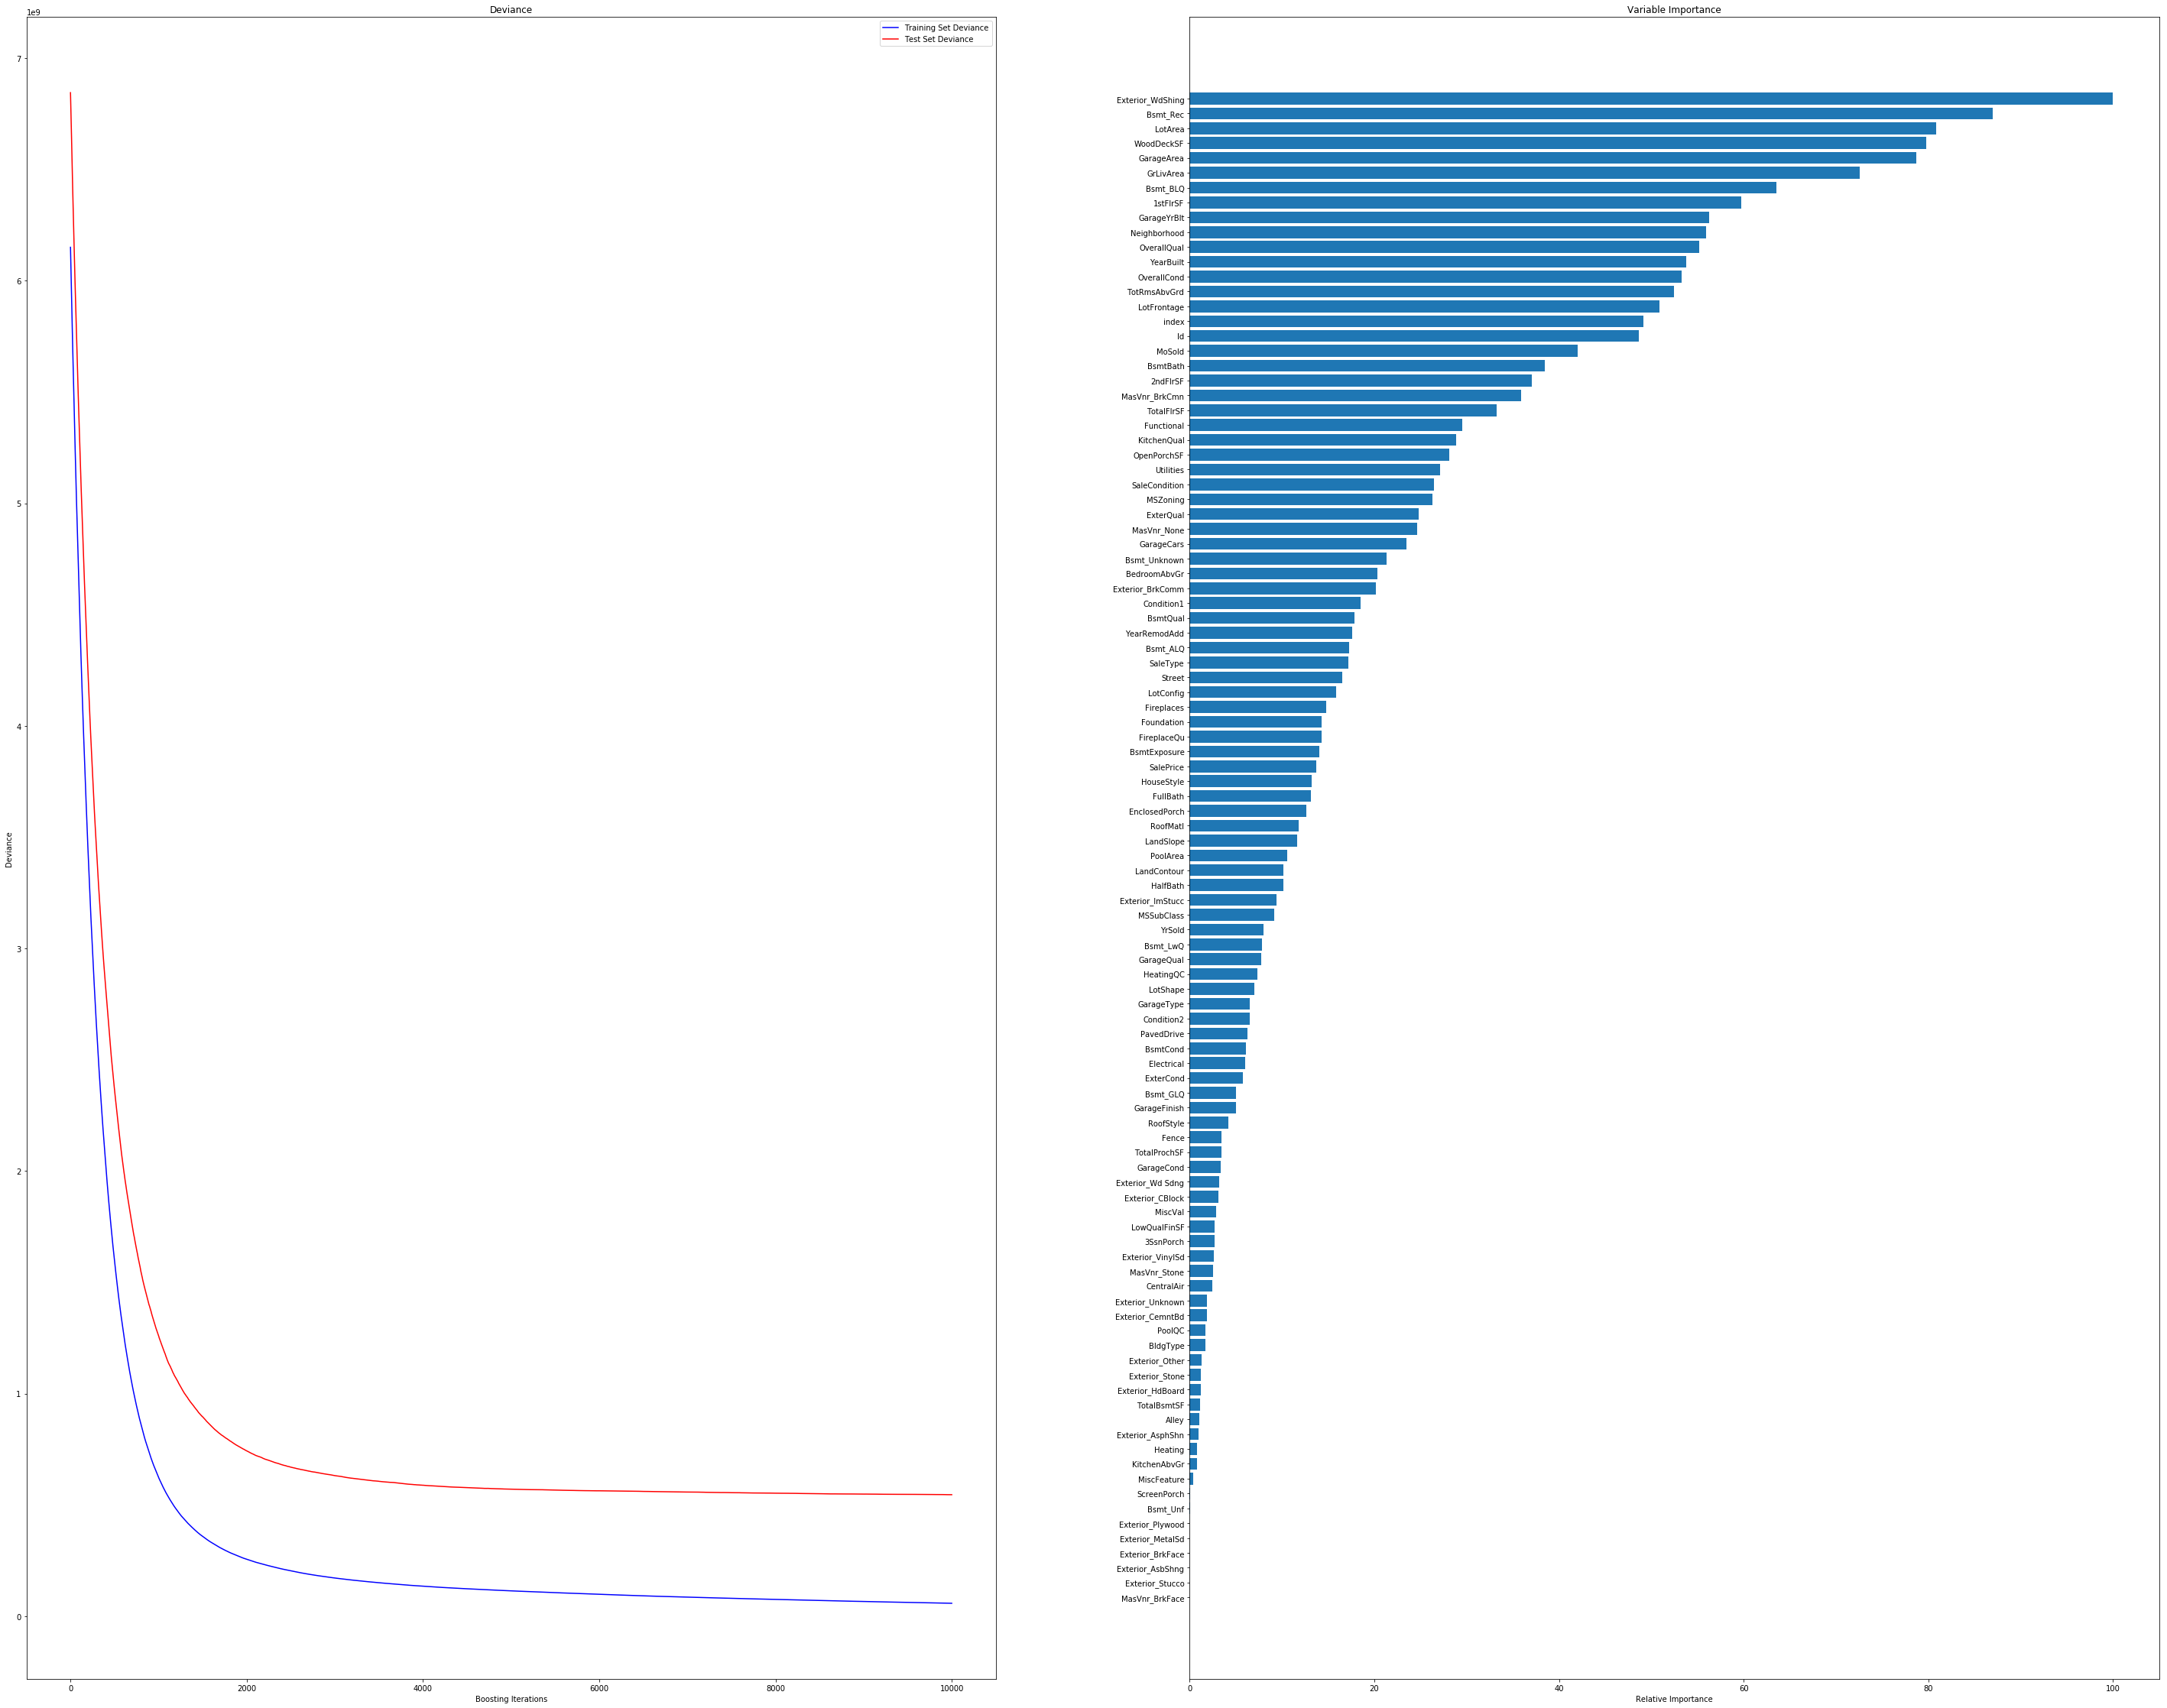

In [64]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=20)


from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
params={'n_estimators': 10000, 'max_depth': 4, 'min_samples_split': 6, 
                 'learning_rate': 0.002, 'loss':'ls', 'max_features':18}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(50, 40))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
          label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
          label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# # #############################################################################
# # Plot feature importance
feature_importance = clf.feature_importances_
# # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##  PARAMETER Tuning: one hot

In [111]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
xg=ensemble.GradientBoostingRegressor()

grid_para_xg =[{'n_estimators': [10000], 'max_depth': [4], 'min_samples_split': [6], 
                 'learning_rate': [0.005,0.003], 'loss':['ls'], 'max_features':[18]}]

#max depth 4 #min_sample:6
#max_features 18
grid_search_xg = model_selection.GridSearchCV(xg, grid_para_xg, scoring='neg_mean_squared_error', cv=3, return_train_score=True,  n_jobs=-1)
#scoring:mse
grid_search_xg.fit(train_x_onehot, train_y_onehot)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [10000], 'max_depth': [4], 'min_samples_split': [6], 'learning_rate': [0.005, 0.003], 'loss': ['ls'], 'max_features': [18]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [113]:
print(grid_search_xg.best_params_)
print(grid_search_xg.best_score_)

{'learning_rate': 0.003, 'loss': 'ls', 'max_depth': 4, 'max_features': 18, 'min_samples_split': 6, 'n_estimators': 10000}
-674568831.5509832


### Model testing: onehot

MSE: 606328800.6819


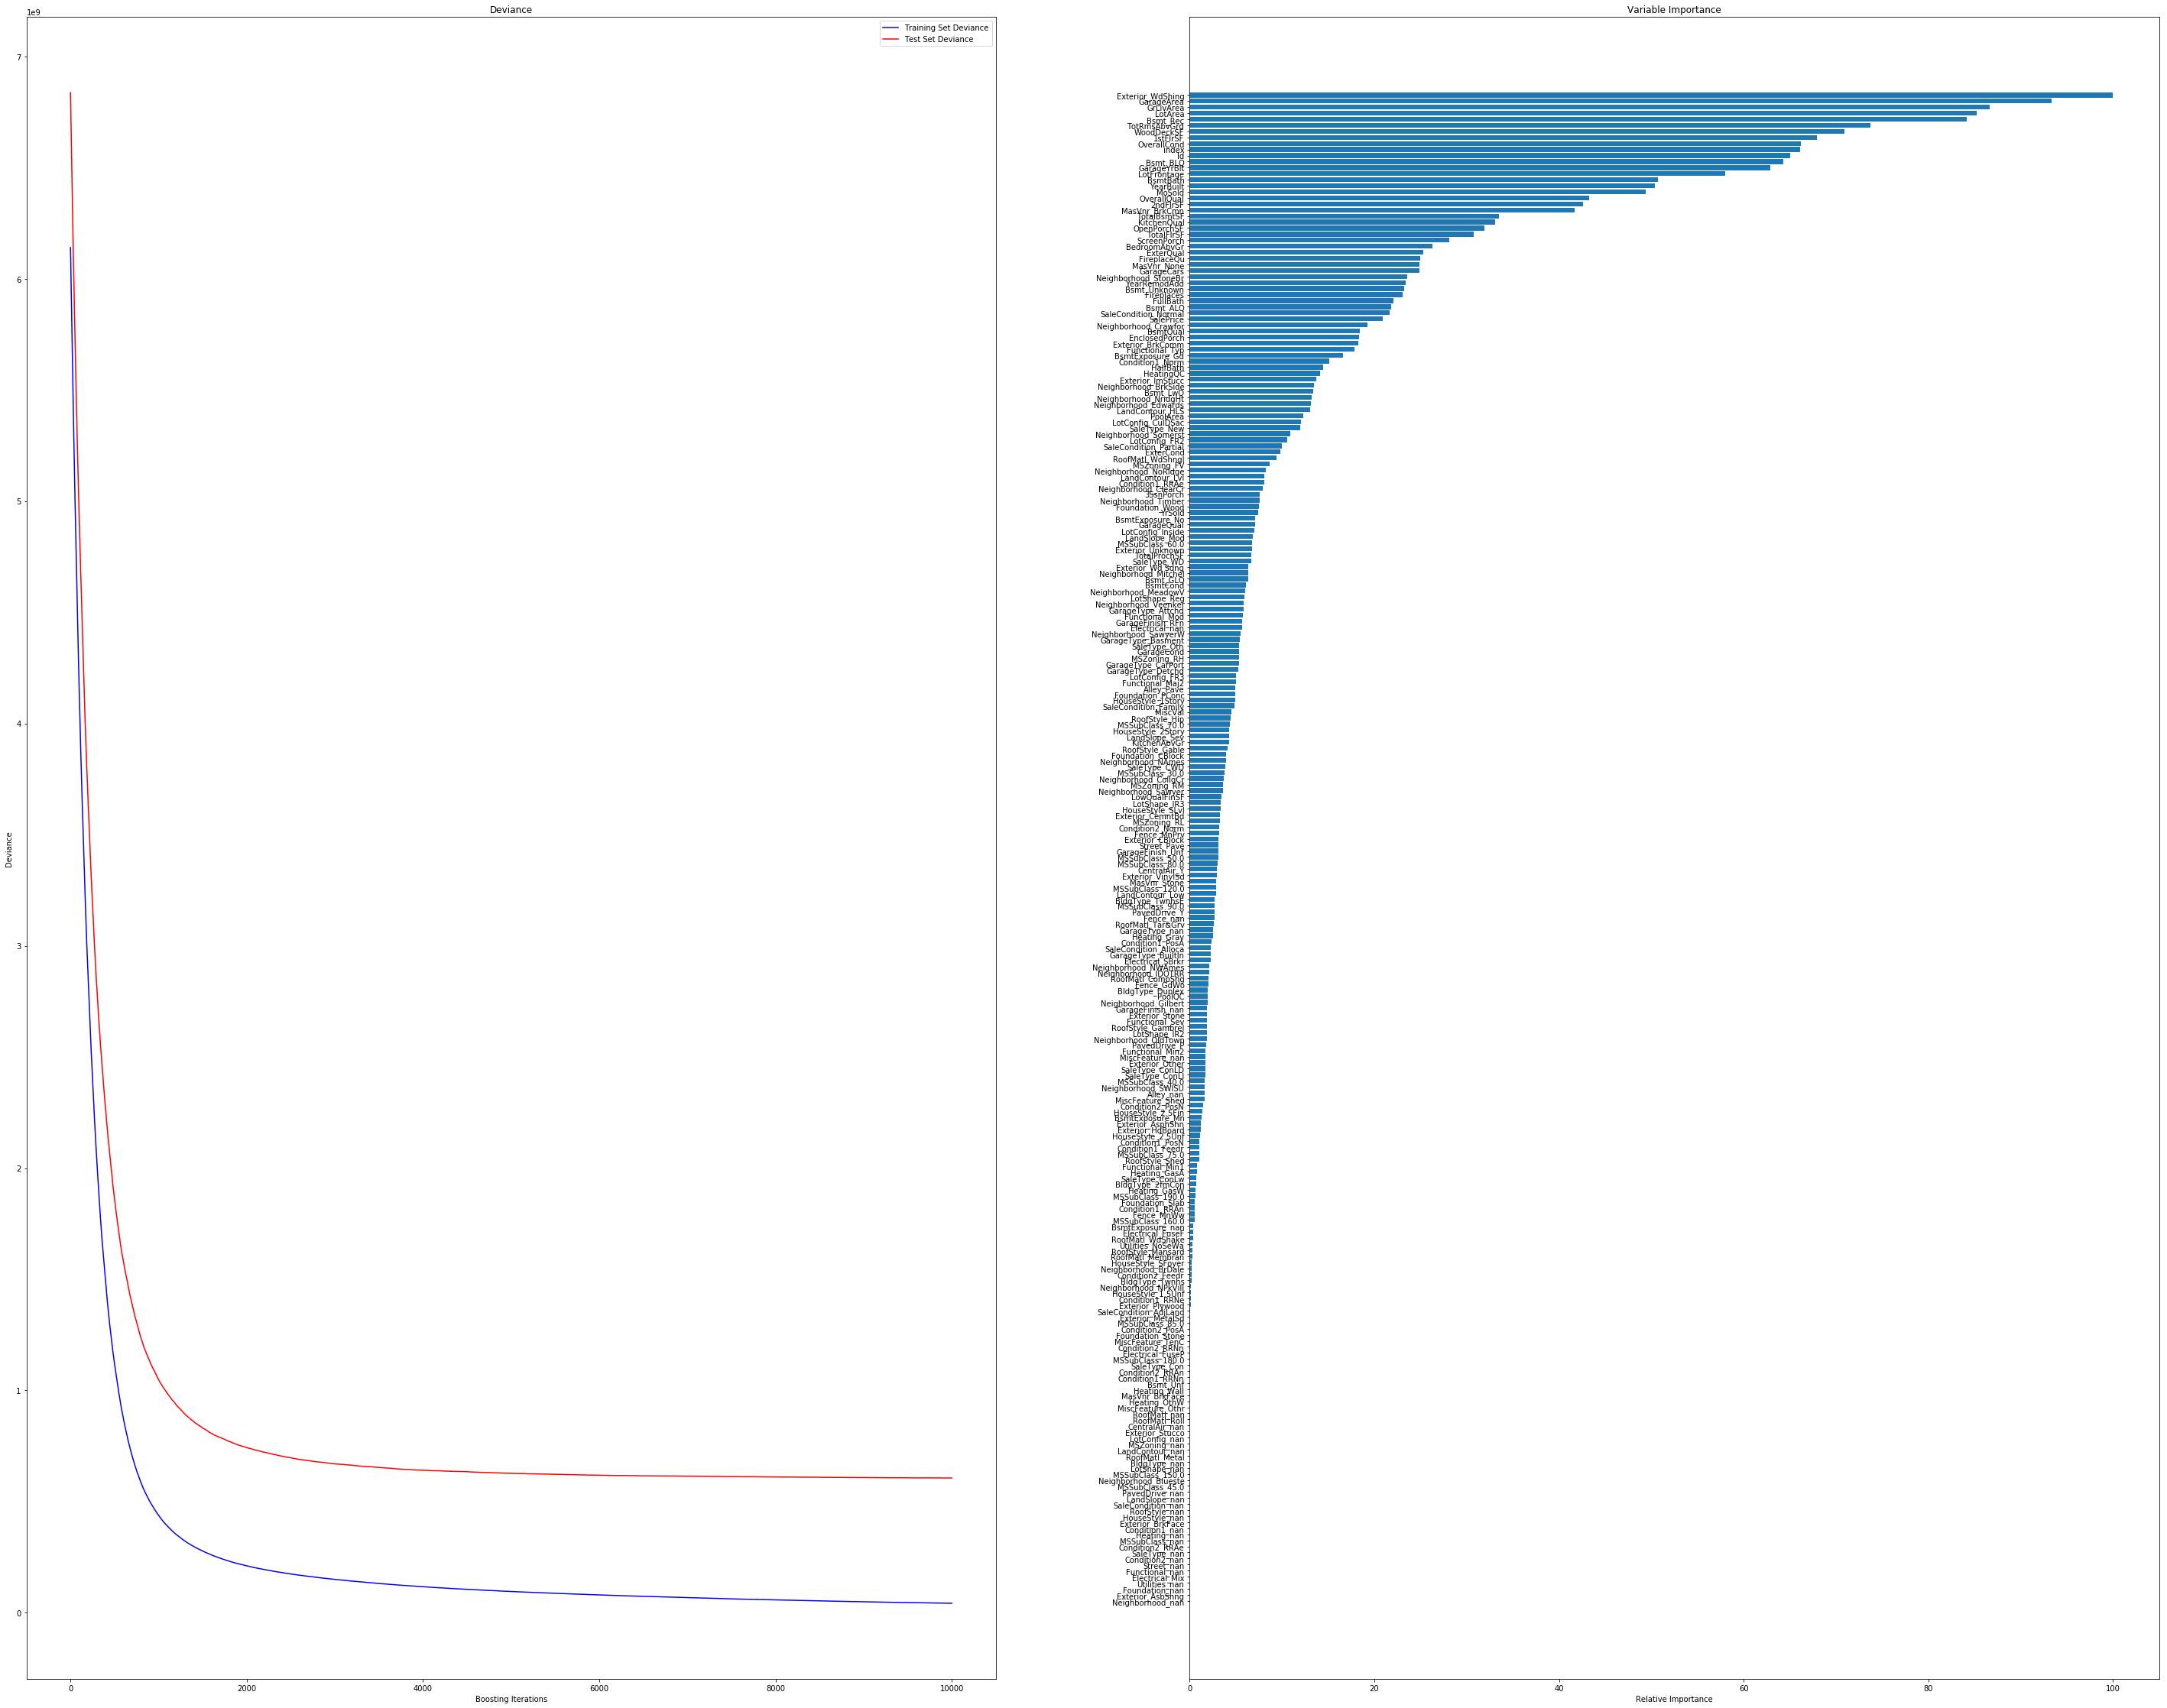

In [115]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(train_x_onehot, train_y_onehot, test_size=0.2, random_state=20)


from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
params={'n_estimators': 10000, 'max_depth': 4, 'min_samples_split': 6, 
                 'learning_rate': 0.003, 'loss':'ls', 'max_features':18}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(50, 40))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
          label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
          label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# # #############################################################################
# # Plot feature importance
feature_importance = clf.feature_importances_
# # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_onehot.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()